<a href="https://colab.research.google.com/github/Geoff89/Hello-World/blob/master/Copy_of_kerasimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!ls

sample_data


In [0]:
/content/sample_data/california_housing_train.csv

In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install -q keras

In [0]:
import keras

Using TensorFlow backend.


In [0]:
image_size = [224, 224]
birdpath = '/content/drive/My Drive/keras/bird.jpg'

In [0]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.layers import Conv2D,Dense,Flatten,Lambda,MaxPool2D
from keras.preprocessing.image import  ImageDataGenerator
from keras.preprocessing import  image
from keras.models import  Model, Sequential
import numpy as np
import matplotlib.pyplot as plt
import glob


In [0]:
#we are going to use transfer learnoing fast before using lesnet
base_model = VGG19(weights = 'imagenet')





574717952/574710816 [==============================] - 17s 0us/step








In [0]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
!ls

drive  sample_data


In [0]:
!pwd

/content


In [0]:
## Horizontal and vertical flips techniques of imagedatagenerator
img = image.load_img(birdpath)

In [0]:
#convert to numpy array
data = image.img_to_array(img)

In [0]:
data.shape

(399, 640, 3)

In [0]:
#expand dimension to one sample
samples = np.expand_dims(data,  axis=0)

In [0]:
samples.shape

(1, 399, 640, 3)

In [0]:
#create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200, 200])

In [0]:
#prepare iterator
it = datagen.flow(samples, batch_size=1)

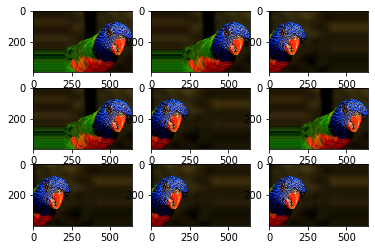

In [0]:
for i in range(9):
  #define subplot
  plt.subplot(330 + 1 + i)
  #generate batch images
  batch = it.next()
  #convert to unsigned intergers for viewong
  image = batch[0].astype('uint8')
  #plot raw pixel data
  plt.imshow(image)
#show figure
plt.show()  


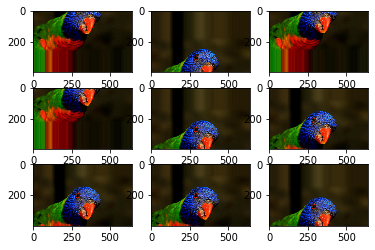

In [0]:
#below is for height shift range
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

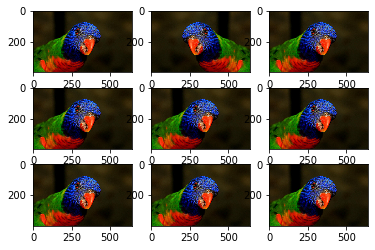

In [0]:
#below is for horizontal flip
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

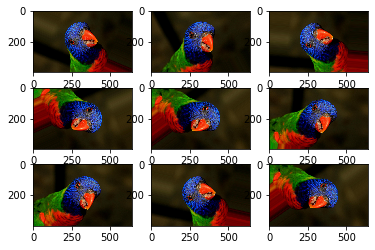

In [0]:
#below is for height shift range
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

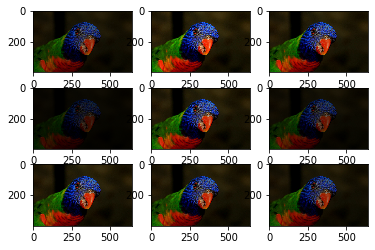

In [0]:
#below is for height shift range
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

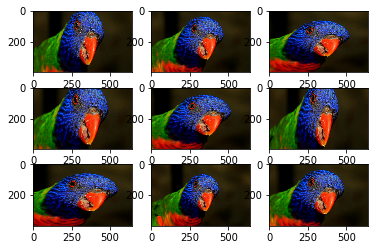

In [0]:
#below is for height shift range
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5, 1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

In [0]:
trainpath = '/content/drive/My Drive/images/trainingset'
validationpath = '/content/drive/My Drive/images/validationset'

In [0]:
#building this model
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [0]:
#compiling this model
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
#generate this images
train_imagedata = ImageDataGenerator(rescale=1./255,shear_range=0.2, 
                                     zoom_range=0.2, horizontal_flip=True)
test_imagedata = ImageDataGenerator(rescale=1./255)

In [0]:
train_set = train_imagedata.flow_from_directory(trainpath,target_size=(64,64),
                                      batch_size=32,class_mode='binary') 
val_set = test_imagedata.flow_from_directory(validationpath,target_size=(64,64), 
                                      batch_size=32, class_mode='binary')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [0]:
history = model.fit_generator(train_set, steps_per_epoch=30, 
                        epochs=30,validation_data=val_set,
                         validation_steps=30)



Epoch 1/30
30/30 [==============================] - 104s 3s/step - loss: 0.5024 - acc: 0.7312 - val_loss: 1.0753 - val_acc: 0.6500
Epoch 2/30
30/30 [==============================] - 12s 413ms/step - loss: 0.2376 - acc: 0.8990 - val_loss: 0.5304 - val_acc: 0.7750
Epoch 3/30
30/30 [==============================] - 13s 428ms/step - loss: 0.1692 - acc: 0.9292 - val_loss: 1.1370 - val_acc: 0.6750
Epoch 4/30
30/30 [==============================] - 12s 415ms/step - loss: 0.1339 - acc: 0.9552 - val_loss: 0.8552 - val_acc: 0.7750
Epoch 5/30
30/30 [==============================] - 13s 418ms/step - loss: 0.1079 - acc: 0.9552 - val_loss: 0.5899 - val_acc: 0.8500
Epoch 6/30
30/30 [==============================] - 12s 415ms/step - loss: 0.0632 - acc: 0.9823 - val_loss: 0.8616 - val_acc: 0.8000
Epoch 7/30
30/30 [==============================] - 12s 414ms/step - loss: 0.0509 - acc: 0.9812 - val_loss: 0.9653 - val_acc: 0.8250
Epoch 8/30
30/30 [==============================] - 13s 418ms/step - 

In [0]:
epochs = history.epoch
history = history.history
acc = history['acc']
loss = history['loss']
val_acc = history['val_acc']
val_loss = history['val_loss']


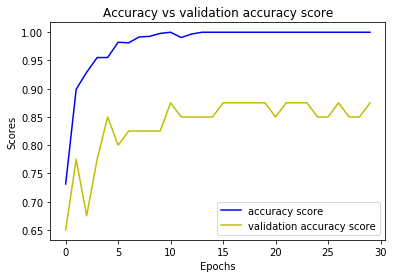

In [0]:
#lets plot the results to see how they are working
plt.figure()
plt.plot(epochs, acc, 'b', label = 'accuracy score')
plt.plot(epochs, val_acc, 'y', label = 'validation accuracy score')
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.legend(loc = 'best')
plt.title('Accuracy vs validation accuracy score')
plt.show()


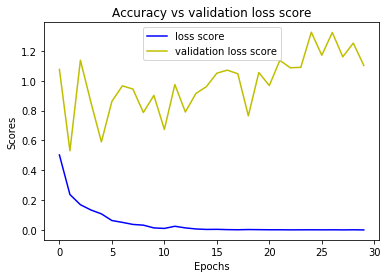

In [0]:
#lets plot the results to see how they are working
plt.figure()
plt.plot(epochs, loss, 'b', label = 'loss score')
plt.plot(epochs, val_loss, 'y', label = 'validation loss score')
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.legend(loc = 'best')
plt.title('Accuracy vs validation loss score')
plt.show()


In [0]:
#lets use transfer learning
from keras.applications.mobilenet import  MobileNet

In [0]:
base_model = MobileNet (weights = 'imagenet', include_top = False, input_shape = (64,64,3))

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [0]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 65, 65, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 32, 32, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 32, 32, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 32, 32, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 32, 32, 32) 

In [0]:
base_model.output

<tf.Tensor 'conv_pw_13_relu_3/Relu6:0' shape=(?, 2, 2, 1024) dtype=float32>

In [0]:
x = base_model.output
x = keras.layers.GlobalMaxPooling2D()(x)
x = Dense(1024, activation='relu')(x)
preds = Dense(1, activation='sigmoid')(x)

In [0]:
model = Model(inputs = base_model.input, outputs = preds)

In [0]:
for layers in model.layers[:20]:
    layers.trainable = False
for layers in model.layers[20:]:
    layers.trainable = True  


In [0]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 65, 65, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 32, 32, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 32, 32, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 32, 32, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 32, 32, 32)        128 

In [0]:
#compiling this model
model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
#generate this images
train_imagedata = ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=40,
                                     width_shift_range=0.2, height_shift_range=0.2, 
                                     zoom_range=0.2, horizontal_flip=True)
test_imagedata = ImageDataGenerator(rescale=1./255)

In [0]:
train_set = train_imagedata.flow_from_directory(trainpath,target_size=(64,64),
                                      batch_size=32,class_mode='binary') 
val_set = test_imagedata.flow_from_directory(validationpath,target_size=(64,64), 
                                      batch_size=32, class_mode='binary')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [0]:
history = model.fit_generator(train_set, steps_per_epoch=30, 
                        epochs=30,validation_data=val_set,
                         validation_steps=30)

Epoch 1/30
30/30 [==============================] - 17s 560ms/step - loss: 0.3756 - acc: 0.8490 - val_loss: 0.2743 - val_acc: 0.8500
Epoch 2/30
30/30 [==============================] - 12s 409ms/step - loss: 0.1572 - acc: 0.9479 - val_loss: 0.2441 - val_acc: 0.9000
Epoch 3/30
30/30 [==============================] - 12s 405ms/step - loss: 0.0918 - acc: 0.9625 - val_loss: 0.5151 - val_acc: 0.7750
Epoch 4/30
30/30 [==============================] - 12s 408ms/step - loss: 0.0664 - acc: 0.9771 - val_loss: 0.2619 - val_acc: 0.8500
Epoch 5/30
30/30 [==============================] - 12s 412ms/step - loss: 0.0316 - acc: 0.9917 - val_loss: 0.2139 - val_acc: 0.9250
Epoch 6/30
30/30 [==============================] - 12s 409ms/step - loss: 0.0326 - acc: 0.9865 - val_loss: 0.8461 - val_acc: 0.7750
Epoch 7/30
30/30 [==============================] - 12s 411ms/step - loss: 0.0418 - acc: 0.9865 - val_loss: 0.3547 - val_acc: 0.8500
Epoch 8/30
30/30 [==============================] - 12s 405ms/step - 

In [0]:
epochs = history.epoch
history = history.history
acc = history['acc']
loss = history['loss']
val_acc = history['val_acc']
val_loss = history['val_loss']


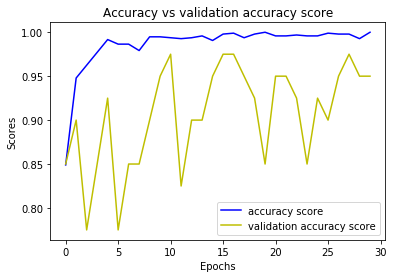

In [0]:
#lets plot the results to see how they are working
plt.figure()
plt.plot(epochs, acc, 'b', label = 'accuracy score')
plt.plot(epochs, val_acc, 'y', label = 'validation accuracy score')
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.legend(loc = 'best')
plt.title('Accuracy vs validation accuracy score')
plt.show()


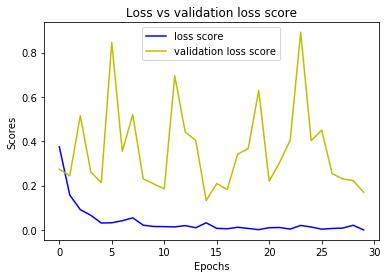

In [0]:
#lets plot the results to see how they are working
plt.figure()
plt.plot(epochs, loss, 'b', label = 'loss score')
plt.plot(epochs, val_loss, 'y', label = 'validation loss score')
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.legend(loc = 'best')
plt.title('Loss vs validation loss score')
plt.show()


In [0]:
plane = '/content/drive/My Drive/images/testtest/test/photo-1473862170180-84427c485aca.jpg'
car = '/content/drive/My Drive/images/testtest/test/photo-1494905998402-395d579af36f.jpg'

In [0]:
#loading and predicting this single images
img = image.load_img(plane, target_size=(64,64))

In [0]:
test_image = image.img_to_array(img)

In [0]:
test_image = np.expand_dims(test_image, 0)

In [0]:
result = model.predict(test_image)

In [0]:
print(result)

[[0.00313827]]


In [0]:
#loading and predicting this single images
img = image.load_img(car, target_size=(64,64))

In [0]:
test_image = image.img_to_array(img)

In [0]:
test_image = np.expand_dims(test_image, 0)

In [0]:
result = model.predict(test_image)

In [0]:
print(result)

[[0.01277305]]
